## 1章　確率分布

<a href="https://colab.research.google.com/github/makaishi2/python_bayes_intro/blob/main/notebooks/1%E7%AB%A0_%E7%A2%BA%E7%8E%87%E5%88%86%E5%B8%83%E3%81%A8%E3%81%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 共通処理

In [1]:
#%matplotlib inline
# 日本語化ライブラリ導入
#!pip install japanize-matplotlib | tail -n 1

In [5]:
# ライブラリのimport

# NumPy用ライブラリ
import numpy as np
# Matplotlib中のpyplotライブラリのインポート
import matplotlib.pyplot as plt
# matplotlib日本語化対応ライブラリのインポート
import japanize_matplotlib
# pandas用ライブラリ
import pandas as pd
# データフレーム表示用関数
from IPython.display import display
# seaborn
import seaborn as sns
# 表示オプション調整
# NumPy表示形式の設定
np.set_printoptions(precision=3, floatmode='fixed')
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
# サイズ設定
plt.rcParams['figure.figsize'] = (6, 6)
# 方眼表示ON
plt.rcParams['axes.grid'] = True
# データフレームでの表示精度
pd.options.display.float_format = '{:.3f}'.format
# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

### 1.3 離散分布と連続分布

#### くじ引き問題の確率分布の可視化プログラム

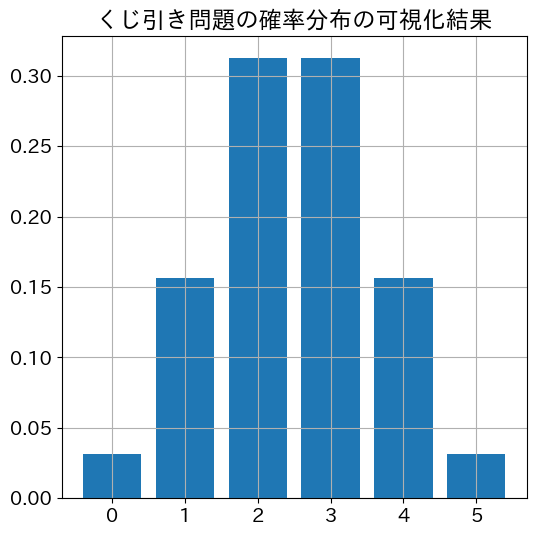

In [6]:
from scipy.special import comb
n = 5
x = range(n+1)
y = [comb(n, i)/2**n for i in x]
plt.bar(x, y)
plt.title('くじ引き問題の確率分布の可視化結果');

#### くじ引き問題の確率分布の可視化プログラム(n=1000)

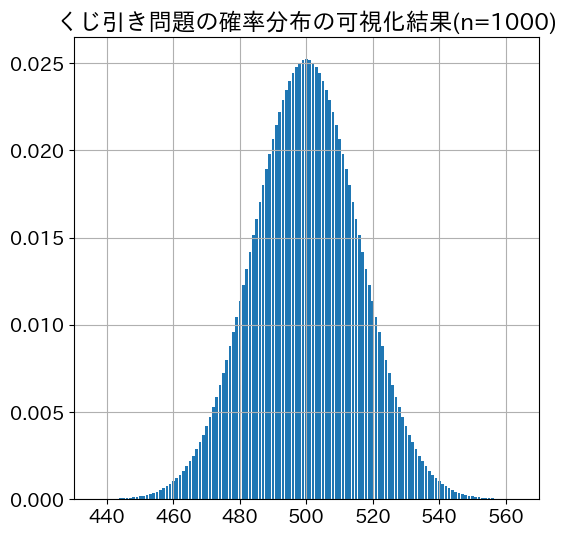

In [7]:
from scipy.special import comb
n = 1000
x = range(n+1)
y = [comb(n, i)/2**n for i in x]
plt.bar(x, y)
plt.xlim((430,570))
plt.title('くじ引き問題の確率分布の可視化結果(n=1000)');

#### 確率分布と正規分布関数の重ね描き

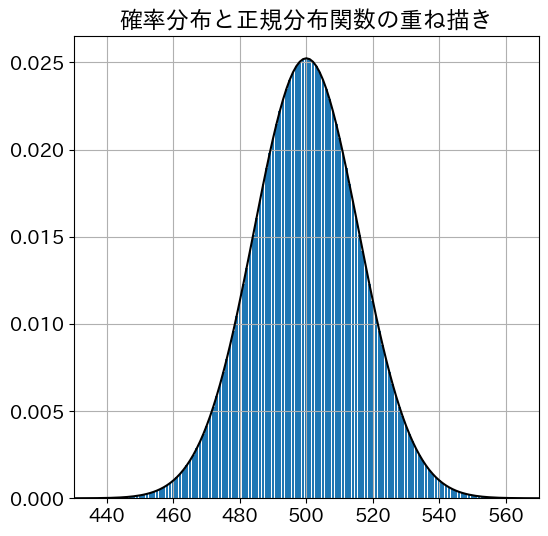

In [8]:
# 正規分布関数の定義
def norm(x, mu, sigma):
    return np.exp(-((x - mu)/sigma)**2/2) / (np.sqrt(2 * np.pi) * sigma)

n = 1000

# グラフ描画
plt.xlim((430,570))
x = np.arange(430, 571)

# 確率分布のグラフ描画
y1 = [comb(n, i)/2**n for i in x]
plt.bar(x, y1)

# 正規分布関数のグラフ描画
mu = n/2
sigma = np.sqrt(mu/2)
y2 = norm(x, mu, sigma)
plt.plot(x, y2, c='k')

plt.title('確率分布と正規分布関数の重ね描き');

#### 正規分布関数と確率の関係正規分布関数と確率の関係

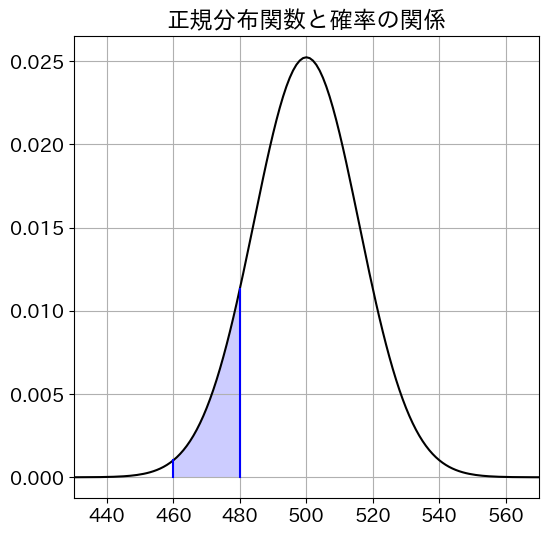

In [9]:
n = 1000

# グラフ描画
plt.xlim((430,570))
x = np.arange(430, 571)
x1 = 460
x2 = 480
x_range = np.arange(x1, x2+1)

# 正規分布関数
mu = n/2
sigma = np.sqrt(mu/2)
plt.plot(x, norm(x, mu, sigma), c='k')
plt.fill_between(x_range, 0, norm(x_range, mu, sigma), facecolor='b', alpha=0.2)
plt.plot((x1, x1), (0, norm(x1, mu, sigma)), c='b')
plt.plot((x2, x2), (0, norm(x2, mu, sigma)), c='b')
plt.title('正規分布関数と確率の関係');

### 1.4 PyMCプログラミング

#### インポート文

In [10]:
import pymc as pm
import arviz as az

print(f"Running on PyMC v{pm.__version__}")
print(f"Running on ArviZ v{az.__version__}")

Running on PyMC v5.11.0
Running on ArviZ v0.17.1


#### 確率モデル定義

In [11]:
# 確率モデルコンテキスト用インスタンス生成
model = pm.Model()

# 先ほど定義したインスタンスを用いてwith文でコンテキストを指定
with model:
    # Binomial: 二項分布の確率分布クラス
    # p: 二項分布の元になる試行の成功確率
    # n: 二項分布における試行回数
    # 'x':  確率変数 x のサンプル値を参照するときのラベル
    x = pm.Binomial('x', p=0.5, n=5)

#### サンプリングの実施

In [12]:
# with modelのコンテキスト定義により、
# 上で定義した確率モデルと紐付けられる
# sample_prior_predictive: 事前分布の予測値取得関数
# 乱数により生成されたサンプル値が変数prior_samplesにセットされる
with model:
    prior_samples = pm.sample_prior_predictive(random_seed=42)

Sampling: [x]


### 1.5 サンプル値分析

#### notebook UIによる方法

In [13]:
prior_samples

Inference data with groups:
	> prior

#### NumPy形式データを抽出して分析する方法

In [14]:
# 事前分布(prior)としてのサンプル値を取得
x_samples = prior_samples['prior']['x'].values
print('type: ', type(x_samples))
print('shape: ', x_samples.shape)
print('values: ' , x_samples, '\n')

# 通常のNumPyデータとして頻度分析をした例
value_counts = pd.DataFrame(
    x_samples.reshape(-1)).value_counts().sort_index()
print(value_counts)

type:  <class 'numpy.ndarray'>
shape:  (1, 500)
values:  [[4 4 4 2 4 1 5 3 1 2 3 1 2 4 2 1 4 0 3 3 1 2 3 4 1 3 1 3 3 3 2 3 1 3 3 3
  0 4 3 1 2 4 3 1 3 3 2 1 1 3 3 2 2 4 4 3 4 3 4 3 5 4 3 2 3 3 3 1 1 2 1 2
  1 1 3 3 2 3 3 4 1 1 3 3 2 2 2 2 3 3 2 2 1 3 2 0 3 4 2 2 2 3 2 4 4 4 1 4
  5 3 1 4 3 3 1 3 3 2 2 3 2 3 3 4 4 1 3 3 4 3 3 4 3 5 3 3 3 2 4 3 3 2 3 3
  3 4 1 4 2 4 3 1 4 4 3 4 2 3 5 2 0 3 2 2 2 3 0 0 2 1 2 4 1 2 3 2 3 3 3 3
  2 1 3 2 2 4 2 3 3 2 2 2 1 3 1 1 3 2 3 1 3 4 3 2 2 2 2 1 2 2 2 4 4 2 2 4
  3 2 3 2 0 3 3 4 3 3 4 2 3 3 2 3 3 1 4 3 1 3 2 4 4 3 4 1 5 2 3 2 2 3 3 4
  2 1 2 4 2 2 3 1 3 3 4 2 2 4 2 2 2 4 2 1 3 2 4 2 2 3 1 2 1 2 1 4 3 5 1 3
  3 2 1 4 2 1 1 2 3 4 2 3 1 3 5 3 2 3 2 2 1 4 3 4 4 3 3 2 2 1 2 2 2 3 4 1
  3 2 3 1 4 2 1 3 3 1 2 3 2 1 1 2 1 2 2 2 2 5 2 2 1 2 4 4 3 3 1 2 5 3 3 2
  4 2 4 2 0 4 2 1 3 2 3 2 1 1 3 1 3 3 2 3 3 2 1 1 1 4 3 3 2 1 2 2 5 2 3 3
  2 1 2 4 2 4 2 2 0 3 2 2 3 1 1 4 3 3 4 4 3 4 1 5 4 3 3 5 3 4 3 3 2 2 3 2
  4 1 1 2 3 3 4 2 2 2 2 3 2 2 4 2 0 2 3 1 2 2 3 4 3 3 3

#### ArviZによる分析

#####  ArviZによるサンプル値の集計

In [15]:
summary = az.summary(prior_samples, kind='stats')
display(summary)

,mean,sd,hdi_3%,hdi_97%
x,2.522,1.103,1.000,4.000


##### ArviZによる可視化分析

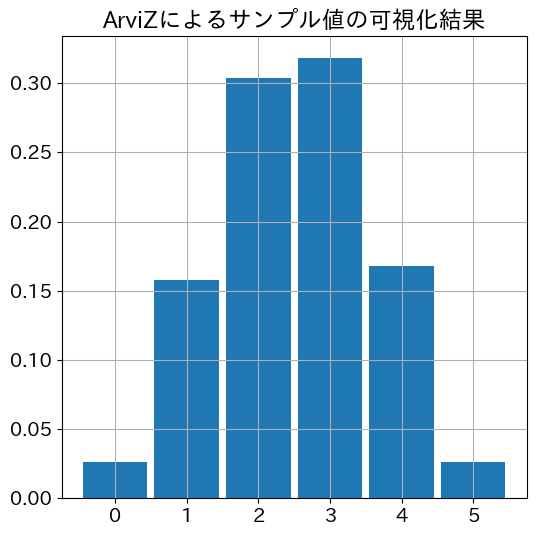

In [16]:
ax = az.plot_dist(x_samples)
ax.set_title('ArviZによるサンプル値の可視化結果');

### バージョンの確認

In [18]:
#!pip install watermark | tail -n 1
%load_ext watermark
%watermark --iversions

matplotlib         : 3.8.3
pymc               : 5.11.0
japanize_matplotlib: 1.1.3
arviz              : 0.17.1
numpy              : 1.26.4
seaborn            : 0.12.2
pandas             : 2.2.1

